In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

In [8]:
# 设置图像大小
IMG_SIZE = 100

# 加载数据集
def load_dataset(dataset_path):
    images = []
    labels = []
    for filename in os.listdir(dataset_path):
        label = filename.split('.')[0]
        if label == 'cat':
            label = 0
        else:
            label = 1
        img = cv2.imread(os.path.join(dataset_path, filename))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# 加载训练集和测试集
train_path = 'D:\\30877\\Documents\\archive\\PetImages\\train'
test_path = 'D:\\30877\\Documents\\archive\\PetImages\\test'
train_images, train_labels = load_dataset(train_path)
test_images, test_labels = load_dataset(test_path)

In [9]:
# 数据预处理和归一化
train_images = train_images / 255.0
test_images = test_images / 255.0

# 构建卷积神经网络模型
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 编译模型
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 训练模型
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
624/624 [==============================] - 80s 126ms/step - loss: 0.6809 - accuracy: 0.5653
Epoch 2/10
624/624 [==============================] - 78s 126ms/step - loss: 0.6644 - accuracy: 0.5992
Epoch 3/10
624/624 [==============================] - 79s 126ms/step - loss: 0.6411 - accuracy: 0.6215
Epoch 4/10
624/624 [==============================] - 78s 126ms/step - loss: 0.5931 - accuracy: 0.6630
Epoch 5/10
624/624 [==============================] - 79s 127ms/step - loss: 0.4980 - accuracy: 0.7239
Epoch 6/10
624/624 [==============================] - 85s 137ms/step - loss: 0.3838 - accuracy: 0.7851
Epoch 7/10
624/624 [==============================] - 86s 138ms/step - loss: 0.3221 - accuracy: 0.8163
Epoch 8/10
624/624 [==============================] - 91s 146ms/step - loss: 0.2913 - accuracy: 0.8297
Epoch 9/10
624/624 [==============================] - 83s 133ms/step - loss: 0.2782 - accuracy: 0.8365
Epoch 10/10
624/624 [==============================] - 86s 138ms/step - l

156/156 [==============================] - 6s 36ms/step - loss: 1.6735 - accuracy: 0.5808
Test Loss: 1.6735339164733887
Test Accuracy: 0.5807939171791077
1/1 [==============================] - 0s 41ms/step


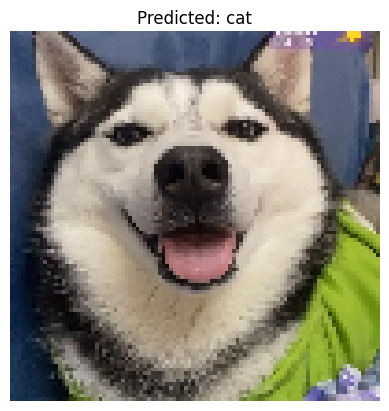

Image is: cat


In [14]:
 # 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

def predict_image(image_path):  
    img = cv2.imread(image_path)  
    if img is None:  
        print("Error: Image not found or unable to read.")  
        return  
  
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  
    img = img / 255.0  
    img = (img * 255).astype(np.uint8)  # 将数据类型转换回 uint8

    img = np.expand_dims(img, axis=0)  

    # 使用模型进行预测  
    prediction = model.predict(img)  
    predicted_class = 'cat' if prediction[0][0] < 0.5 else 'dog'  

    # 显示图像
    plt.imshow(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))  # 将 BGR 转换为 RGB，因为 matplotlib 使用 RGB
    plt.axis('off')  # 不显示坐标轴
    plt.title(f'Predicted: {predicted_class}')
    plt.show()  

    return predicted_class
  
image_path = 'D:\\30877\\Documents\\archive\\PetImages\\dog.00002.jpg'  
prediction = predict_image(image_path)  
print(f'Image is: {prediction}')